In [61]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt
%matplotlib inline

In [62]:
# read in the data
# change column names as required
train_df = pd.read_csv('ts_data.csv')
junc1_ts = train_df
junc1_ts["ds"]= junc1_ts["time"]
junc1_ts["y"] = junc1_ts["num"]
junc1_ts['y'] = np.log(junc1_ts['y'])
del junc1_ts["num"]
del junc1_ts["time"]
junc1_ts.tail()

,ds,y
8779,2016-05-31 19,9.924172
8780,2016-05-31 20,9.848345
8781,2016-05-31 21,9.843207
8782,2016-05-31 22,9.729551
8783,2016-05-31 23,9.378985


INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


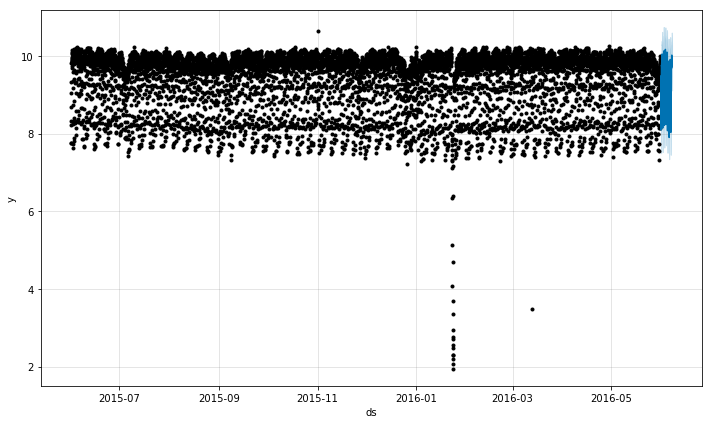

In [63]:
# make prediction
m = Prophet(changepoint_prior_scale = 0.01).fit(junc1_ts)
future = m.make_future_dataframe(periods = 168, freq = 'H', include_history = False)
fcst = m.predict(future)
m.plot(fcst).savefig('future_prediction.png');

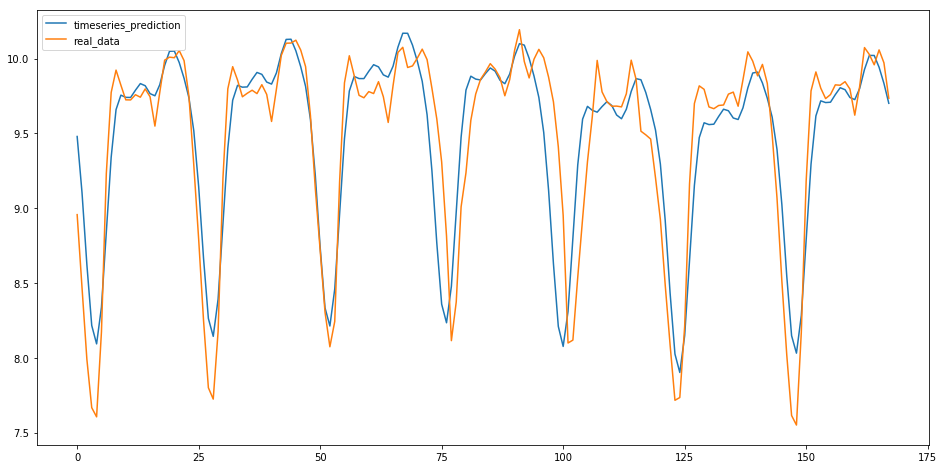

In [64]:
# compare real data with time series result
plt.figure(figsize = (16,8))
plt.plot(fcst["yhat"][:168],label = "timeseries_prediction")

real_data = pd.read_csv('real_2016-06.csv')
plt.plot(np.array(np.log(real_data['num'][:168])), label = "real_data")
plt.legend()
plt.savefig('ts_vs_real.png')

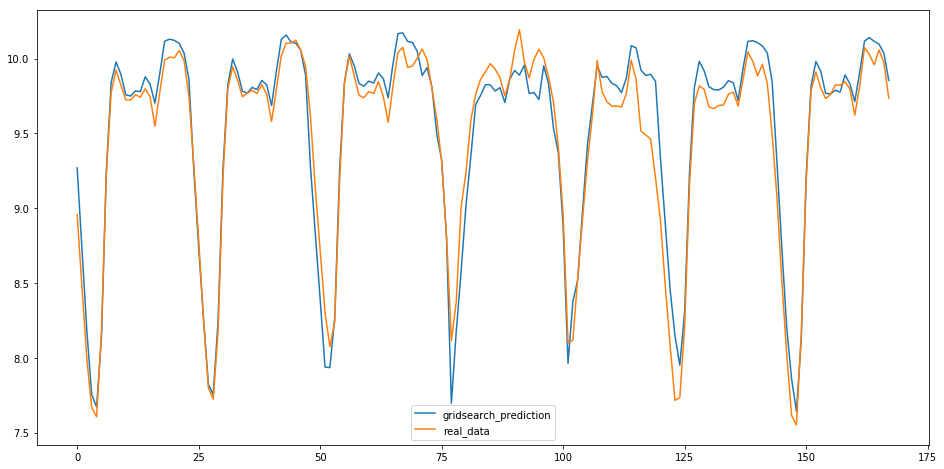

In [65]:
# compare real data with regression model result
plt.figure(figsize = (16,8))
gridsearch_data = pd.read_csv('gridsearch_2016-06.csv')
plt.plot(np.array(np.log(gridsearch_data['count'][:168])), label = "gridsearch_prediction")

real_data = pd.read_csv('real_2016-06.csv')
plt.plot(np.array(np.log(real_data['num'][:168])), label = "real_data")
plt.legend()
plt.savefig('gs_vs_real.png')

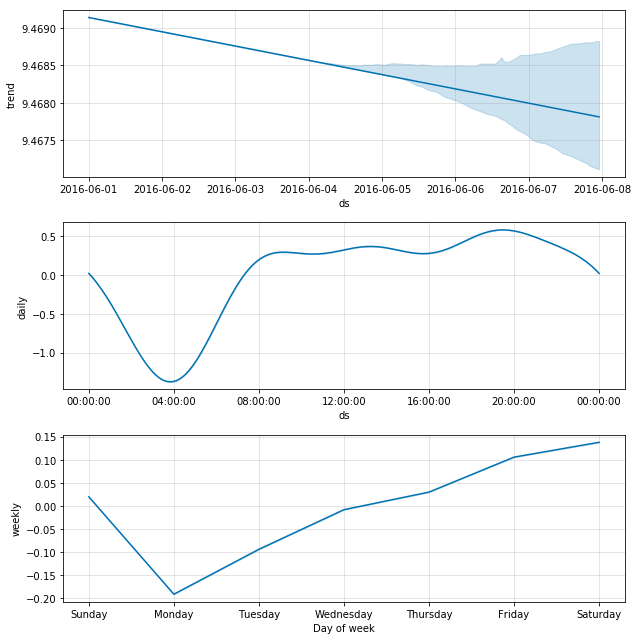

In [66]:
# performance of time series
m.plot_components(fcst).savefig('performance.png')

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


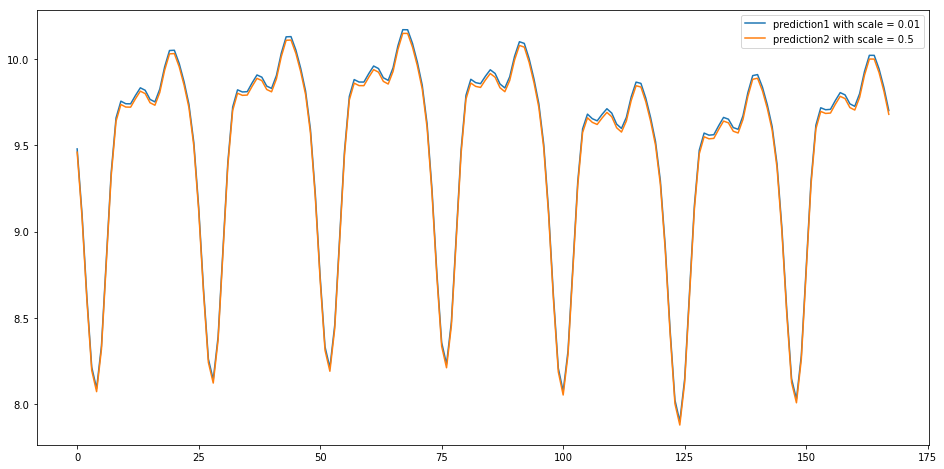

In [67]:
# time series results with different scales
m2 = Prophet(changepoint_prior_scale = 0.5).fit(junc1_ts)
future2 = m2.make_future_dataframe(periods = 168, freq = 'H', include_history = False)
fcst2 = m2.predict(future)

plt.figure(figsize = (16,8))
plt.plot(fcst["yhat"][:168],label = "prediction1 with scale = 0.01")
plt.plot(fcst2["yhat"][:168],label = "prediction2 with scale = 0.5")
plt.legend()